In [14]:
import pandas as pd

# Load a game
df = pd.read_parquet('data/ab2-ab2-100k/fffff13f-b9de-48e1-a20d-9324f25cacea.parquet')


# Check dimensions
print(df.shape)

# Get feature columns
features = [c for c in df.columns if c.startswith('F_')]
tensors = [c for c in df.columns if c.startswith('BT_')]
actions = ['ACTION', 'ACTION_TYPE']
rewards = ['RETURN', 'TOURNAMENT_RETURN']

# Training data
X = df[features + tensors]  # or df[tensors] for CNN
y = df['ACTION']  # or df['RETURN'] for value prediction

(19, 4318)


In [15]:
df[rewards]

,RETURN,TOURNAMENT_RETURN
0,1.0,1009.933221
1,-1.0,-997.020034
2,1.0,1009.933221
3,-1.0,-997.020034
4,1.0,1009.933221
5,-1.0,-997.020034
6,1.0,1009.933221
7,-1.0,-997.020034
8,1.0,1009.933221
9,1.0,1009.933221


In [16]:
import os

directory_path = "data/ab2-ab2-100k"  # Replace with your directory path
number_of_elements = len(os.listdir(directory_path))
print(f"Number of elements in the directory: {number_of_elements}")

Number of elements in the directory: 85208


In [17]:
num_samples = 100
tot_rows = 0
for file in os.listdir(directory_path)[:num_samples]:
    df = pd.read_parquet(os.path.join(directory_path, file))
    tot_rows += df.shape[0]
print(f"Total rows: {tot_rows}")
print(f"Average rows: {tot_rows / num_samples}")

Total rows: 2141
Average rows: 21.41


In [18]:
from catanatron.gym.envs.catanatron_env import ACTIONS_ARRAY, ACTION_SPACE_SIZE
import collections

print(f'Action space size: {ACTION_SPACE_SIZE}')
print(f'Total actions in array: {len(ACTIONS_ARRAY)}')

counts = collections.Counter([(action[0].name if hasattr(action[0], 'name') else action[0]) for action in ACTIONS_ARRAY])
print('\nAction counts by type:')
for action_type, count in sorted(counts.items()):
    print(f'  {action_type}: {count}')

Action space size: 290
Total actions in array: 290

Action counts by type:
  BUILD_CITY: 54
  BUILD_ROAD: 72
  BUILD_SETTLEMENT: 54
  BUY_DEVELOPMENT_CARD: 1
  DISCARD: 1
  END_TURN: 1
  MARITIME_TRADE: 60
  MOVE_ROBBER: 19
  PLAY_KNIGHT_CARD: 1
  PLAY_MONOPOLY: 5
  PLAY_ROAD_BUILDING: 1
  PLAY_YEAR_OF_PLENTY: 20
  ROLL: 1


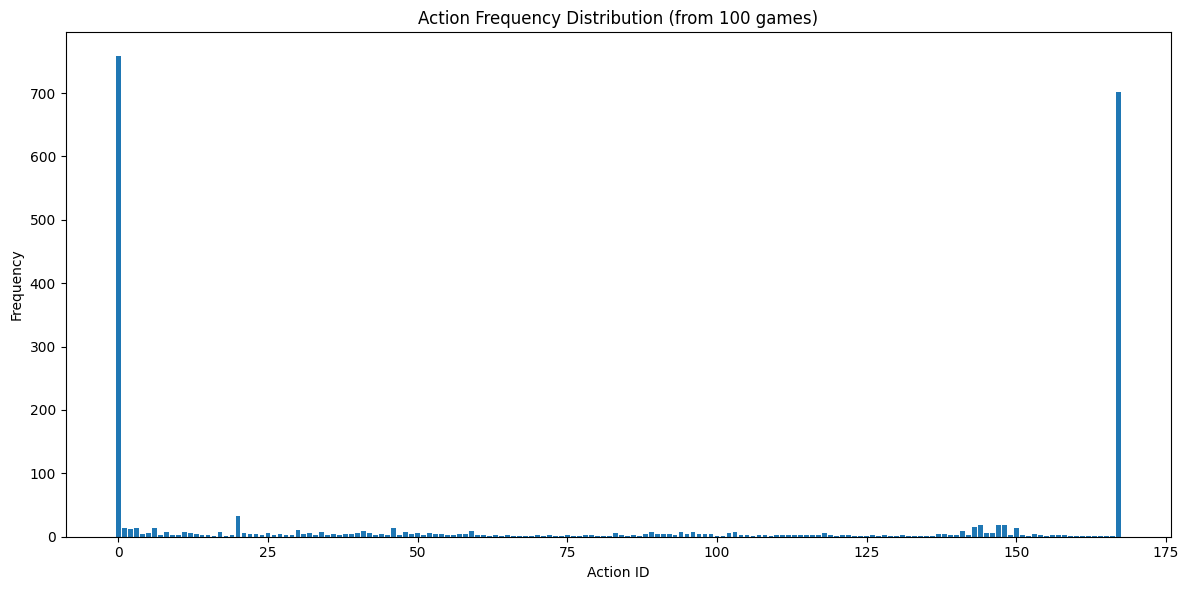

Total actions: 2141
Unique actions: 168

Top 10 most frequent actions:
0      758
289    702
20      32
242     19
238     18
241     18
237     15
6       14
246     14
1       14
Name: count, dtype: int64


In [19]:
import matplotlib.pyplot as plt

# Collect all actions from n samples
num_samples = 100
all_actions = []

for file in os.listdir(directory_path)[:num_samples]:
    df = pd.read_parquet(os.path.join(directory_path, file))
    all_actions.extend(df['ACTION'].tolist())

# Count frequency of each action
action_counts = pd.Series(all_actions).value_counts().sort_index()

# Create histogram
plt.figure(figsize=(12, 6))
plt.bar(range(len(action_counts)), action_counts.values)
plt.xlabel('Action ID')
plt.ylabel('Frequency')
plt.title(f'Action Frequency Distribution (from {num_samples} games)')
plt.tight_layout()
plt.show()

print(f'Total actions: {len(all_actions)}')
print(f'Unique actions: {len(action_counts)}')
print(f'\nTop 10 most frequent actions:')
print(action_counts.sort_values(ascending=False).head(10))
